In [1]:
import mglearn
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
import scipy as scipy
import seaborn as sns

import ssl 
ssl._create_default_https_context = ssl._create_unverified_context

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Cross validation for evaluation

Benefits of cross validation:
* Uses the data more effectively than when using a standard training and test division
* More robust (with train-test division you may get (un)lucky)
* Gives insight into the sensitivity of the model

Disadvantage:
* Computational cost

## Example

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

### Using a decision tree

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
scores = cross_val_score(tree, cancer.data, cancer.target, cv=5)
print("Cross validation scores: {}".format(scores))

Cross validation scores: [0.9122807  0.93859649 0.92105263 0.95614035 0.90265487]


In [4]:
print("Average cross validation score: {}".format(scores.mean()))

Average cross validation score: 0.9261450085390466


In [5]:
print("Standard deviation of the cross validation scores: {}".format(scores.std()))

Standard deviation of the cross validation scores: 0.019103392506715375


### Using a naive Bayes

In [6]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
scores = cross_val_score(nb, cancer.data, cancer.target)

In [7]:
print("Cross validation scores: {}".format(scores))

Cross validation scores: [0.92105263 0.92105263 0.94736842 0.94736842 0.95575221]


In [8]:
print("Average cross validation score: {}".format(scores.mean()))

Average cross validation score: 0.9385188635305075


In [9]:
print("Standard deviation of the cross validation scores: {}".format(scores.std()))

Standard deviation of the cross validation scores: 0.014585994424363306


### Leave one out cross validation

Leave one out cross validation is a special type of cross validation, where each fold is a single sample
* Can provides better estimates on smaller datasets, but is more time consuming

In [10]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

In [11]:
nb = GaussianNB()
scores = cross_val_score(nb, cancer.data, cancer.target, cv=loo)

In [12]:
print("Cross validation scores: {}".format(scores))

Cross validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1

In [13]:
print("Average cross validation score: {}".format(scores.mean()))

Average cross validation score: 0.9384885764499121


In [14]:
print("Standard deviation of the cross validation scores: {}".format(scores.std()))

Standard deviation of the cross validation scores: 0.24026603655724954


# Overfitting

## Load the data

In [15]:
from sklearn.datasets import load_breast_cancer

# Load the data and divide into training and test
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

## Decision tree overfitting

In [16]:
from sklearn.tree import DecisionTreeClassifier

training_accuracy = []
test_accuracy = []
# try max depths from 1 to 10
max_depth_list = range(1, 11)

for depth in max_depth_list:
    # build the model
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(max_depth_list, training_accuracy, label="training accuracy")
plt.plot(max_depth_list, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

## kNN overfitting

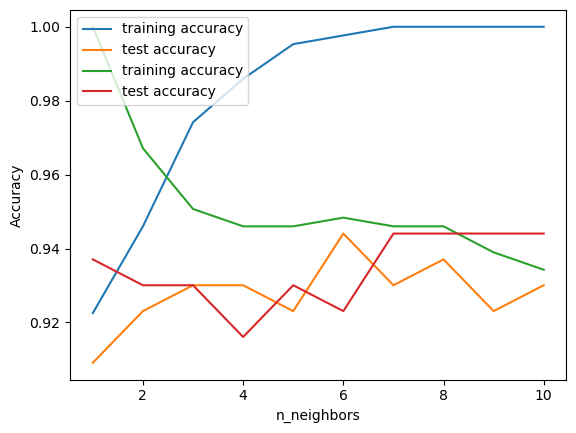

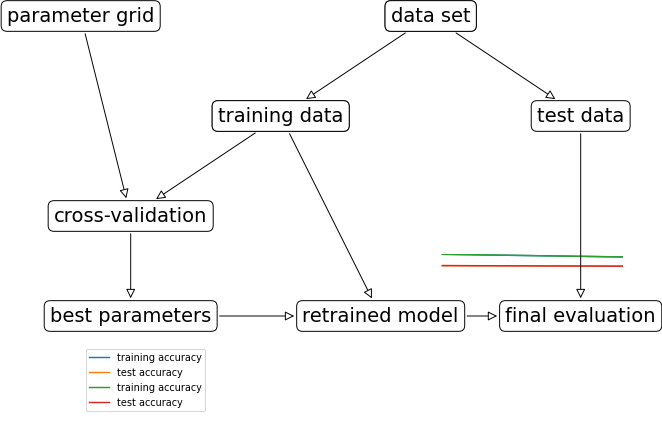

In [34]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

## Selecting parameters using a validation set

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer

Divide the data into training data, validation data, and test data

In [19]:
cancer = load_breast_cancer()
X_trainval, X_test, y_trainval, y_test = train_test_split(cancer.data, cancer.target, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, random_state=43)
print("Size of training set:{}".format(X_train.shape[0]))
print("Size of validation set:{}".format(X_val.shape[0]))
print("Size of test set:{}".format(X_test.shape[0]))

Size of training set:319
Size of validation set:107
Size of test set:143


Find the best number of neighbors using the validation set

In [20]:
best_score = 0
for num_neighbors in range(1,15):
    # Learn the model with a certain numnber of neighbors
    knn = KNeighborsClassifier(n_neighbors=num_neighbors)
    knn.fit(X_train, y_train)
    
    # Evaluate the model
    score = knn.score(X_val, y_val)
    
    # If improvement, store score and parameter
    if score>best_score:
        best_score = score
        best_num_neighbors = num_neighbors

# Build a model on the combine training and valiation data
knn = KNeighborsClassifier(n_neighbors=best_num_neighbors)
knn.fit(X_trainval, y_trainval)

print("Best number of neighbors found: {}".format(best_num_neighbors))
print("Best score on validation set: {}".format(best_score))
print("Score on training/validation set: {}".format(knn.score(X_trainval, y_trainval)))
print("Score on test set: {}".format(knn.score(X_test, y_test)))

Best number of neighbors found: 8
Best score on validation set: 0.9626168224299065
Score on training/validation set: 0.9389671361502347
Score on test set: 0.958041958041958


## Selecting parameters using cross validation

In [21]:
mglearn.plots.plot_grid_search_overview()

Divide the data into training data and test data (no validation data!)

In [22]:
cancer = load_breast_cancer()
X_trainval, X_test, y_trainval, y_test = train_test_split(cancer.data, cancer.target, random_state=42)
print("Size of training set:{}".format(X_train.shape[0]))
print("Size of test set:{}".format(X_test.shape[0]))

Size of training set:319
Size of test set:143


Find the best number of neighbors using cross validation

In [23]:
from sklearn.model_selection import cross_val_score
best_score = 0
for num_neighbors in range(1,15):
    # Set a certain number of neighbors
    knn = KNeighborsClassifier(n_neighbors=num_neighbors)
    
    # Perform cross validation
    scores = cross_val_score(knn, X_trainval, y_trainval, cv=5)
    
    # Compute the mean score
    score = scores.mean()
    
    # If improvement, store score and parameter
    if score>best_score:
        best_score = score
        best_num_neighbors = num_neighbors

# Build a model on the combine training and valiation data
knn = KNeighborsClassifier(n_neighbors=best_num_neighbors)
knn.fit(X_trainval, y_trainval)

print("Best number of neighbors found: {}".format(best_num_neighbors))
print("Best average score: {}".format(best_score))
print("Score on training/validation set: {}".format(knn.score(X_trainval, y_trainval)))
print("Score on test set: {}".format(knn.score(X_test, y_test)))

Best number of neighbors found: 8
Best average score: 0.9294391244870042
Score on training/validation set: 0.9389671361502347
Score on test set: 0.958041958041958


### sklearn actually has support for performing this operation

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [25]:
# Fix the parameter space
parameters = {'n_neighbors': range(1,15)}
grid_search = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, return_train_score=True)

In [26]:
# Load the data and divide into train and test
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

Perform the search; all results are stored within `grid_search`

In [27]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 15)}, return_train_score=True)

Print some results

In [28]:
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test score: 0.96


In [29]:
print("Best parameter: {}".format(grid_search.best_params_))

Best parameter: {'n_neighbors': 8}


In [30]:
print("Best cross-validation score: {}".format(grid_search.best_score_))

Best cross-validation score: 0.9294391244870042


In [31]:
print("Best estimator: {}".format(grid_search.best_estimator_))

Best estimator: KNeighborsClassifier(n_neighbors=8)


In [32]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001945,0.000490,0.019259,0.011378,1,{'n_neighbors': 1},0.965116,0.870588,0.905882,0.894118,...,0.905964,0.031721,14,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.003777,0.003174,0.007744,0.004369,2,{'n_neighbors': 2},0.953488,0.905882,0.917647,0.882353,...,0.913051,0.023244,12,0.958824,0.964809,0.967742,0.970674,0.970674,0.966545,0.004431
2,0.000462,0.000086,0.002282,0.000878,3,{'n_neighbors': 3},0.953488,0.882353,0.976471,0.882353,...,0.920109,0.038326,6,0.938235,0.956012,0.938416,0.953079,0.944282,0.946005,0.007363
3,0.000481,0.000079,0.002092,0.001088,4,{'n_neighbors': 4},0.953488,0.882353,0.952941,0.858824,...,0.910698,0.037771,13,0.929412,0.956012,0.935484,0.938416,0.935484,0.938962,0.009015
4,0.000577,0.000296,0.001690,0.000201,5,{'n_neighbors': 5},0.953488,0.870588,0.976471,0.858824,...,0.915404,0.045595,10,0.917647,0.950147,0.929619,0.935484,0.935484,0.933676,0.010500
5,0.000454,0.000037,0.002787,0.001877,6,{'n_neighbors': 6},0.965116,0.882353,0.964706,0.882353,...,0.922435,0.036999,4,0.917647,0.944282,0.920821,0.947214,0.938416,0.933676,0.012169
6,0.000962,0.000786,0.003187,0.002354,7,{'n_neighbors': 7},0.988372,0.870588,0.964706,0.882353,...,0.924733,0.045663,3,0.920588,0.944282,0.926686,0.941349,0.938416,0.934264,0.009080
7,0.000989,0.000486,0.004248,0.003097,8,{'n_neighbors': 8},0.988372,0.870588,0.976471,0.894118,...,0.929439,0.045902,1,0.917647,0.941349,0.923754,0.935484,0.938416,0.931330,0.009083
8,0.001886,0.000754,0.009602,0.006078,9,{'n_neighbors': 9},0.988372,0.870588,0.964706,0.894118,...,0.922380,0.045665,5,0.920588,0.938416,0.923754,0.929619,0.932551,0.928986,0.006324
9,0.001171,0.000446,0.011724,0.001494,10,{'n_neighbors': 10},0.988372,0.882353,0.964706,0.894118,...,0.927086,0.041734,2,0.920588,0.935484,0.923754,0.932551,0.935484,0.929572,0.006218
